# Study about dataset AVA

An info file was made with all the information about this dataset. In this notebook, we study the different variables, focusing on tags.

In [1]:
%matplotlib inline

import pickle
import pandas
import numpy
import gzip
import matplotlib.pyplot as plt

In [2]:
colorGraph=['r','c','gold','g','darkorange','lightcoral','yellow','blue','crimson',
            'blueviolet','dodgerblue','hotpink','lime','firebrick','y','sage','violet',
           'blanchedalmond','silver','sienna','orchid','navy','tomato','seagreen','red']

First we load the serialized object with the dataset information. This object is an instance of DataFrame from Pandas. And show some information.

In [3]:
data=pickle.load(gzip.open('../packages/info.pklz','rb',2))

In [8]:
print ('The total number of images is: %d' % len(data))

The total number of images is: 255353


In [10]:
names=data.columns.values.tolist()
print ('VARIABLES NAME')
print ('\n'.join(str(x)+': '+str(names[x]) for x in range(0,len(names))))

VARIABLES NAME
0: line
1: id
2: vote1
3: vote2
4: vote3
5: vote4
6: vote5
7: vote6
8: vote7
9: vote8
10: vote9
11: vote10
12: tag1
13: tag2
14: challenge
15: Complementary_Colors
16: Duotones
17: HDR
18: Image_Grain
19: Light_On_White
20: Long_Exposure
21: Macro
22: Motion_Blur
23: Negative_Image
24: Rule_of_Thirds
25: Shallow_DOF
26: Silhouettes
27: Soft_Focus
28: Vanishing_Point
29: animal
30: architecture
31: cityscape
32: floral
33: fooddrink
34: landscape
35: portrait
36: stilllife


## Tags

AVA dataset has two variables, labeled as 'tag1' and 'tag2'. Both can take values from 0 to 66. 0 represents that there is not tag. Each tag represents one characteristic about the image. Now we show some information about this tags and their values.

In [12]:
tags=pickle.load(gzip.open('../packages/tags.pklz','rb',2))

First, the different tags:

In [13]:
tags

{1: 'Abstract',
 2: 'Cityscape',
 3: 'Fashion',
 4: 'Family',
 5: 'Humorous',
 6: 'Interior',
 7: 'Sky',
 8: 'Snapshot',
 9: 'Sports',
 10: 'Urban',
 11: 'Vintage',
 12: 'Emotive',
 13: 'Performance',
 14: 'Landscape',
 15: 'Nature',
 16: 'Candid',
 17: 'Portraiture',
 18: 'Still',
 19: 'Animals',
 20: 'Architecture',
 21: 'Black',
 22: 'Macro',
 23: 'Travel',
 24: 'Action',
 25: 'Photojournalism',
 26: 'Nude',
 27: 'Rural',
 28: 'Water',
 29: 'Studio',
 30: 'Political',
 31: 'Advertisement',
 32: 'Persuasive',
 33: 'Panoramic',
 34: 'Digital',
 35: 'Seascapes',
 36: 'Traditional',
 37: 'Diptych',
 38: 'Floral',
 39: 'Transportation',
 40: 'Food',
 41: 'Science',
 42: 'Wedding',
 43: 'Astrophotography',
 44: 'Military',
 45: 'History',
 46: 'Infrared',
 47: 'Self',
 48: 'Textures',
 49: 'DPChallenge',
 50: 'Children',
 51: 'Blur',
 52: 'Photo-Impressionism',
 53: 'High',
 54: 'Texture',
 55: 'Overlays',
 56: 'Maternity',
 57: 'Birds',
 58: 'Horror',
 59: 'Music',
 60: 'Pinhole/Zone',
 

Now, the number of images that have 0, 1 or 2 tags:

In [20]:
from __future__ import print_function
aux=list(zip(data.loc[:,'tag1'].tolist(),data['tag2'].tolist()))

aux0 = list(filter(lambda a: a[0]==0 and a[1]==0 , aux))
aux1 = list(filter(lambda a: a[0]!=0 and a[1]==0 , aux))
aux2 = list(filter(lambda a: a[0]!=0 and a[1]!=0 , aux))

print("Without tags:\t%d\nWith 1 tag:\t%d\nWith 2 tags:\t%d" % (len(aux0),len(aux1),len(aux2)))

Without tags:	58541
With 1 tag:	45882
With 2 tags:	150930


And the distribution of the labels in different situation:
    1) Tag1 and Tag2 distribution in all images without 0's

/home/frubio/.virtualenvs/cv/lib/python3.4/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


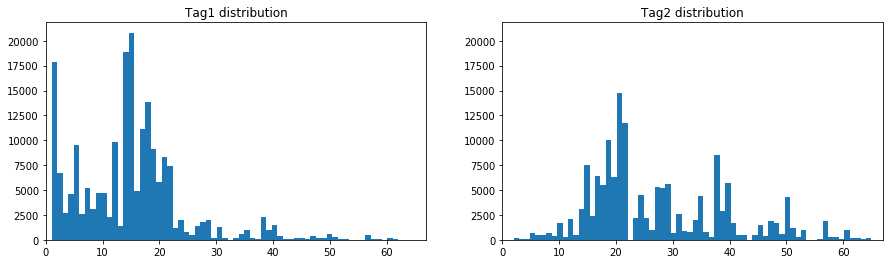

In [22]:
plot0=list(filter(lambda a: a != 0, data['tag1'].tolist()))
plot1=list(filter(lambda a: a != 0, data['tag2'].tolist()))

fig = plt.figure(figsize=(15, 4))
fig1=fig.add_subplot(121)
fig1.hist(plot0,bins=66)
fig1.set_title('Tag1 distribution')
plt.xlim([0,67])

fig2=fig.add_subplot(122,sharey=fig1)
fig2.hist(plot1,bins=66)
fig2.set_title('Tag2 distribution')
plt.xlim([0,67])

fig.show()


    2) Distribution for images with 2 tags and for 1 tag:

/home/frubio/.virtualenvs/cv/lib/python3.4/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


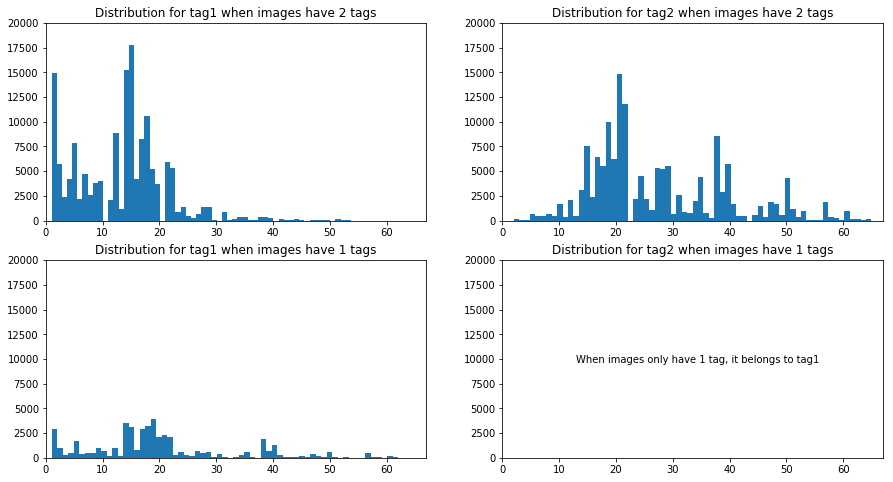

In [23]:
list1, list2 = zip(*aux2)

fig = plt.figure(figsize=(15, 8))
fig1=fig.add_subplot(221)
fig1.hist(list1,bins=66)
fig1.set_title('Distribution for tag1 when images have 2 tags')
plt.xlim([0,67])
plt.ylim([0,20000])

fig1=fig.add_subplot(222)
fig1.hist(list2,bins=66)
fig1.set_title('Distribution for tag2 when images have 2 tags')
plt.xlim([0,67])
plt.ylim([0,20000])

list1,list2=zip(*aux1)

fig1=fig.add_subplot(223)
fig1.hist(list1,bins=66)
fig1.set_title('Distribution for tag1 when images have 1 tags')
plt.xlim([0,67])
plt.ylim([0,20000])

fig2=fig.add_subplot(224)
fig2.annotate('When images only have 1 tag, it belongs to tag1',xy=(13, 9600))
fig2.set_title('Distribution for tag2 when images have 1 tags')
plt.xlim([0,67])
plt.ylim([0,20000])

fig.show()

## Technique applied

There are another tag that represents the technique applied in the photography. This variable is not annotated for all the images. Besides, there is a group that only have been labeled with the most representative characteristic. However, there is a subset that have been annotated with all the techniques applied. For this reason, 14 variables have been built, one for each technique.

Images without annotated technique have all this variables with NaN value. In the case of the most representative label, this technique is marked as 1 and the rest as NaN. Finally, the subset with all the techniques applied are represented by the 1 if the technique is present in the image and 0 for the opposite.

Below we see some graphics and information about the distribution of the techniques variables:

In [24]:
techniqueDistr=[0] * 15
for i in range(1,len(data)):
    techniqueDistr[sum(~pandas.isnull(data.iloc[i,15:29]) & data.iloc[i,15:29]!=0)]+=1

In [26]:
print ('Images without technique:\t\t%d\nImages with 1 or more techniques:\t%d'
       % (techniqueDistr[0],sum(techniqueDistr[1:])))

Images without technique:		241509
Images with 1 or more techniques:	13843


In [27]:
print('Distribution for the number of techniques applied in the images:')
for i in range(1,len(techniqueDistr)):
    if (techniqueDistr[i]>0):
        print('\t%d\timages with %d technique/s applied' % (techniqueDistr[i],i))

Distribution for the number of techniques applied in the images:
	12757	images with 1 technique/s applied
	921	images with 2 technique/s applied
	157	images with 3 technique/s applied
	8	images with 4 technique/s applied


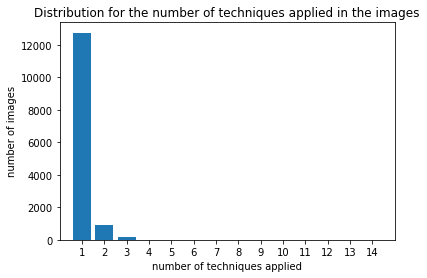

In [28]:
plt.bar(range(1,15),techniqueDistr[1:],align='center')
plt.xticks(range(1,15))
plt.xlim(0,15)
plt.title('Distribution for the number of techniques applied in the images')
plt.ylabel('number of images')
plt.xlabel('number of techniques applied')
plt.show()

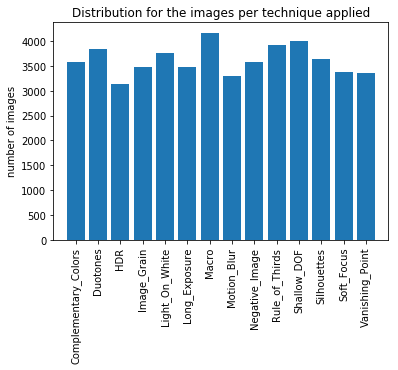

In [29]:
techniqueCounts=[]
for i in range(15,29):
    techniqueCounts.append(sum(~pandas.isnull(data.iloc[:,i])))
plt.bar(range(1,15),techniqueCounts,align='center')
plt.xticks(range(1,15), data.columns.values[15:29], rotation='vertical')
plt.xlim(0,15)
plt.title('Distribution for the images per technique applied')
plt.ylabel('number of images')
plt.show()

## Type of image

In the same way as technique, a subset of images have been annotated with information about the type of photography. There are 8 diferent types and images are labeled with only one of them.

In [30]:
typeDistr=[0] * 9
for i in range(1,len(data)):
    typeDistr[sum(~pandas.isnull(data.iloc[i,29:37]) & data.iloc[i,29:37]!=0)]+=1
typeDistr=typeDistr[0:2]

In [31]:
print ('Images without type:\t%d\nImages with 1 type:\t%d'
       % (typeDistr[0],typeDistr[1]))

Images without type:	215529
Images with 1 type:	39823


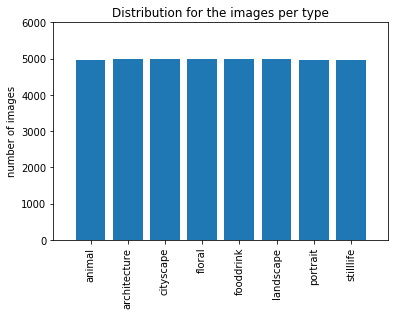

In [32]:
aestheCounts=[]
for i in range(29,37):
    aestheCounts.append(sum(~pandas.isnull(data.iloc[:,i])))

plt.bar(range(1,9),aestheCounts,align='center')
plt.xticks(range(1,9), data.columns.values[29:37], rotation='vertical')
plt.xlim(0,9)
plt.ylim(0,6000)
plt.ylabel('number of images')
plt.title('Distribution for the images per type')
plt.show()

## All Tags

In this section, different subsets are made with those images that have multiple tags. The different sets of tags are the follow:
    a) one or two tag variables must be different from 0.
    b) one of the techniques must be different from NaN value.
    c) one of the type must be different from NaN value.

These are the results:

In [33]:
dataAll=data[data.apply(lambda x: x[12]!=0 and x[13]!=0 and sum(~pandas.isnull(x[15:29]))>0 and
                        sum(~pandas.isnull(x[29:37]))>0, axis=1)]

In [34]:
print ('Number of images with all the tags: %d'% len(dataAll))

Number of images with all the tags: 1879


In [35]:
data1Tag=data[data.apply(lambda x: x[12]!=0 and sum(~pandas.isnull(x[15:29]))>0 and
                        sum(~pandas.isnull(x[29:37]))>0, axis=1)]

In [36]:
print ('Number of images with at least one of the tag variables, but with technique and type: %d'% len(data1Tag))

Number of images with at least one of the tag variables, but with technique and type: 2285


In [37]:
dataTagsType=data[data.apply(lambda x: x[12]!=0 and x[13]!=0 and
                        sum(~pandas.isnull(x[29:37]))>0, axis=1)]

In [38]:
print ('Number of images with at least two tag variables and type: %d'% len(dataTagsType))

Number of images with at least two tag variables and type: 32466


In [39]:
data1TagType=data[data.apply(lambda x: x[12]!=0 and
                        sum(~pandas.isnull(x[29:37]))>0, axis=1)]

In [40]:
print ('Number of images with at least one tag variable and type: %d'% len(data1TagType))

Number of images with at least one tag variable and type: 39820


In [41]:
dataTagsTech=data[data.apply(lambda x: x[12]!=0 and x[13]!=0 and sum(~pandas.isnull(x[15:29]))>0, axis=1)]

In [42]:
print ('Number of images with at least two tag variables and technique: %d'% len(dataTagsTech))

Number of images with at least two tag variables and technique: 8573


In [43]:
data1TagTech=data[data.apply(lambda x: x[12]!=0 and sum(~pandas.isnull(x[15:29]))>0, axis=1)]

In [44]:
print ('Number of images with at least one tag variable and technique: %d'% len(data1TagTech))

Number of images with at least one tag variable and technique: 11103


## Votes

Finally is the turn of the votes and how there are distributed in the dataset. Moreover, partitions of these distributions are made in function of the technique and the type.

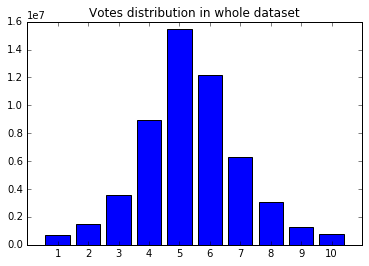

In [31]:
voteCounts=[]
for i in range(2,12):
    voteCounts.append(sum(data.iloc[:,i]))
plt.bar(range(1,11),voteCounts, align='center')
plt.xticks(range(1,11))
plt.xlim(0,11)
plt.title('Votes distribution in whole dataset')
plt.show()

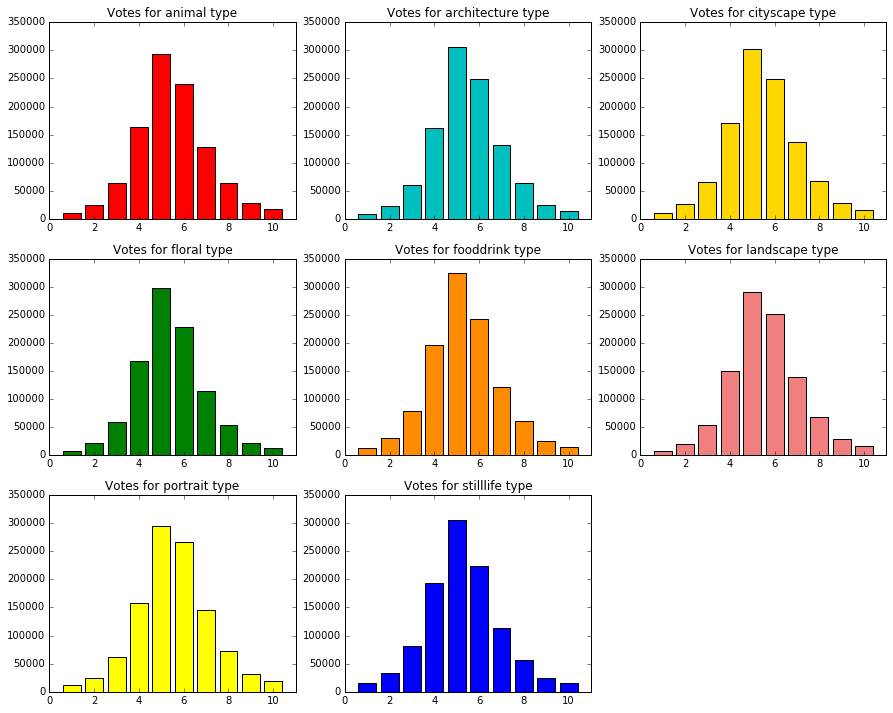

In [32]:

fig = plt.figure(figsize=(15, 12))

for j in range(29,37):
    dataAux=data[data.iloc[:,j]==1]
    voteCounts=[]
    for i in range(2,12):
        voteCounts.append(sum(dataAux.iloc[:,i]))

    fig1=fig.add_subplot(3,3,j-28)
    fig1.bar(range(1,11),voteCounts, align='center',color=colorGraph[j-29])
    fig1.set_title('Votes for '+dataAux.columns.values[j]+' type')
    plt.xlim([0,11])
    plt.ylim([0,350000])

plt.show()

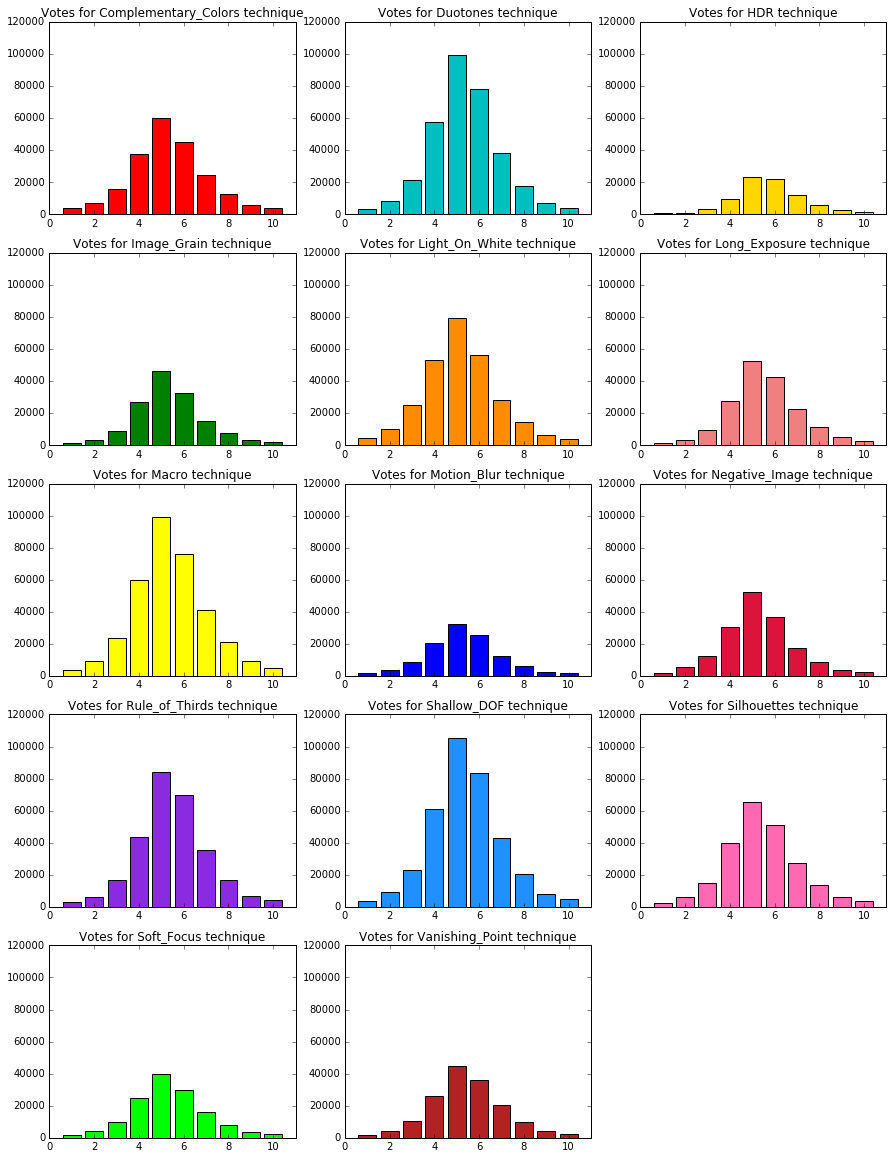

In [33]:
fig = plt.figure(figsize=(15, 20))

for j in range(15,29):
    dataAux=data[data.iloc[:,j]==1]
    voteCounts=[]
    for i in range(2,12):
        voteCounts.append(sum(dataAux.iloc[:,i]))

    fig1=fig.add_subplot(5,3,j-14)
    fig1.bar(range(1,11),voteCounts, align='center',color=colorGraph[j-15])
    fig1.set_title('Votes for '+dataAux.columns.values[j]+' technique')
    plt.xlim([0,11])
    plt.ylim([0,120000])

plt.show()

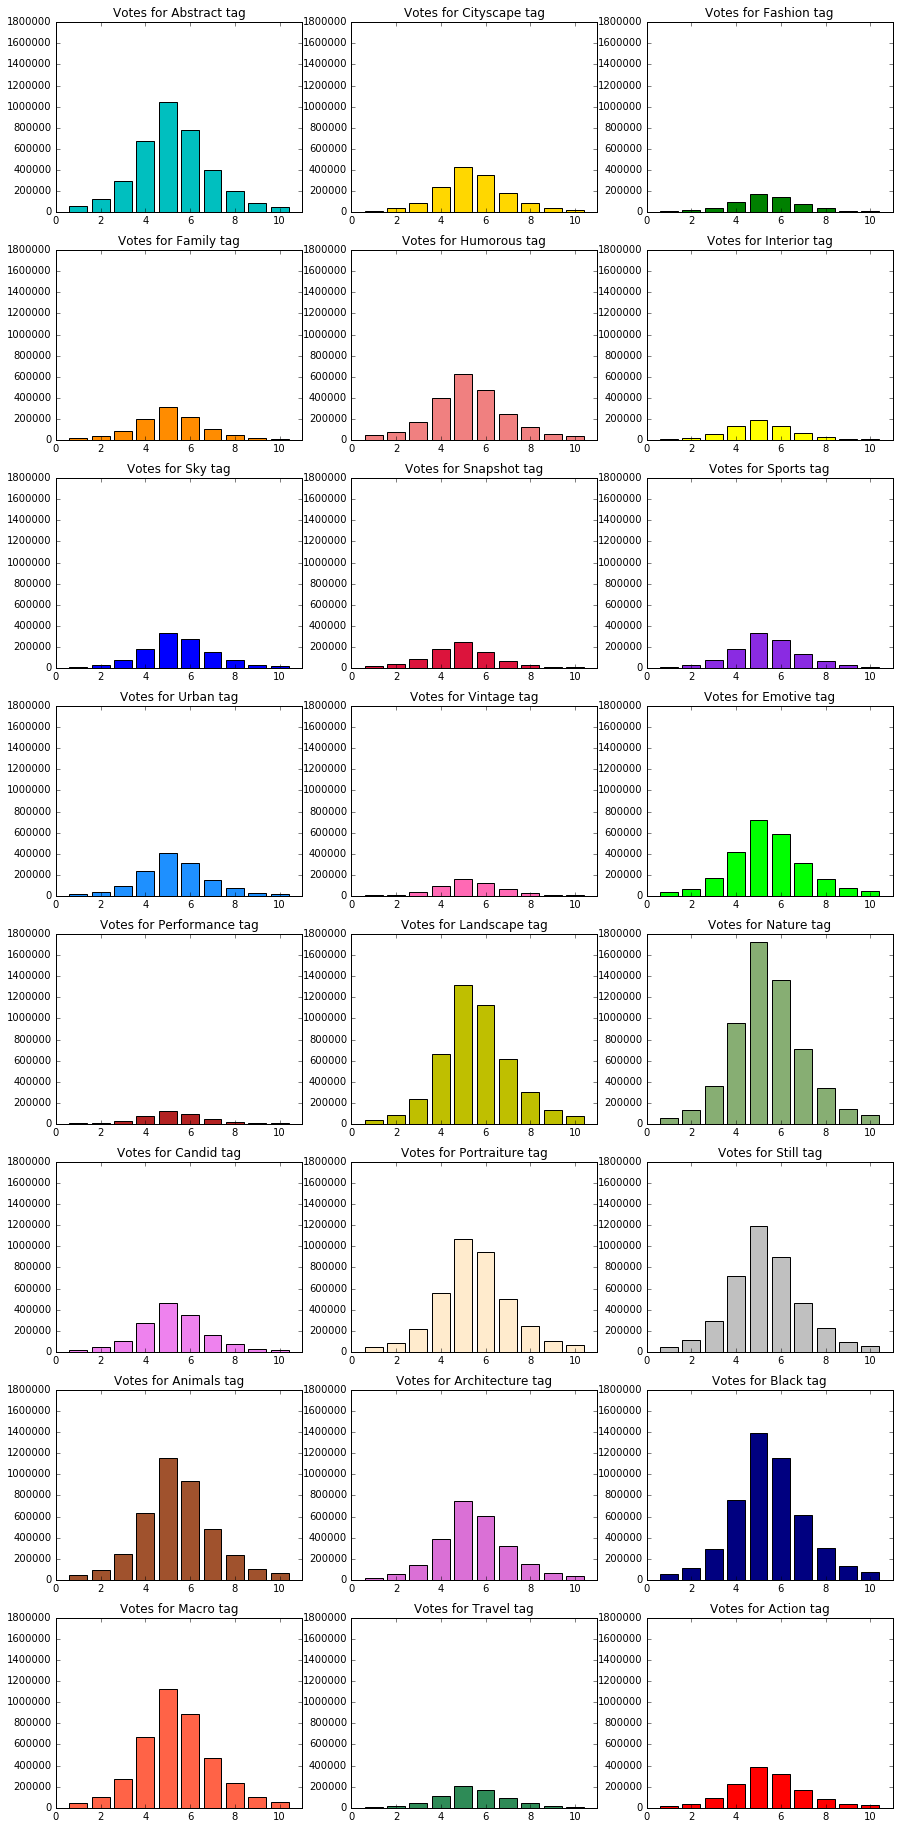

In [34]:
fig = plt.figure(figsize=(15, 32))

for j in range(1,25):
    dataAux=data[(data.iloc[:,12]==j) | (data.iloc[:,13]==j)]
    voteCounts=[]
    for i in range(2,12):
        voteCounts.append(sum(dataAux.iloc[:,i]))

    fig1=fig.add_subplot(8,3,j)
    fig1.bar(range(1,11),voteCounts, align='center',color=colorGraph[j])
    fig1.set_title('Votes for '+tags[j]+' tag')
    plt.xlim([0,11])
    plt.ylim([0,1800000])

plt.show()

In the next graphs, we show the vote's distribution split by the mean ([0,3],(3,7),[7,10])

In [35]:
num_images=len(data)
auxMeanVector=numpy.array([0.0]*num_images)
for i in range(0,num_images):
    auxMean=0.0
    auxTotal=0.0
    votesList=list(data.iloc[i,2:12])
    for j in range(0,10):
        auxMean+=(j+1)*votesList[j]
        auxTotal+=votesList[j]
    auxMeanVector[i]=auxMean/auxTotal

data.loc[:,'VotesMean'] = pandas.Series(auxMeanVector, index=data.index)

In [36]:
num_images=len(data)
auxWeight=numpy.array([0]*num_images)
for i in range(0,num_images):
    auxMean=data.iloc[i,37]
    if(auxMean > 4):
        if(auxMean >=6):
            auxWeight[i]=2
        else:
            auxWeight[i]=1
data.loc[:,'Weight'] = pandas.Series(auxWeight, index=data.index)

In [37]:
print('# of images with mean in range [0,4]: %d' % sum(data.iloc[:,38]==0))
print('# of images with mean in range (4,6): %d' % sum(data.iloc[:,38]==1))
print('# of images with mean in range [6,10]: %d' % sum(data.iloc[:,38]==2))

# of images with mean in range [0,4]: 8086
# of images with mean in range (4,6): 197113
# of images with mean in range [6,10]: 50154


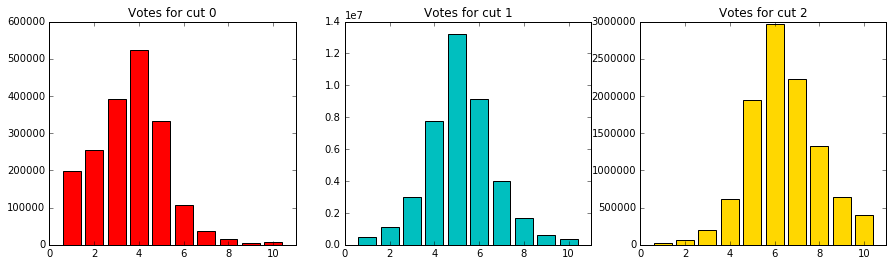

In [38]:
fig = plt.figure(figsize=(15, 4))

for j in range(0,3):
    dataAux=data[(data.iloc[:,38]==j)]
    voteCounts=[]
    for i in range(2,12):
        voteCounts.append(sum(dataAux.iloc[:,i]))

    fig1=fig.add_subplot(1,3,j+1)
    fig1.bar(range(1,11),voteCounts, align='center',color=colorGraph[j])
    fig1.set_title('Votes for cut %d'%j)
    plt.xlim([0,11])
    #plt.ylim([0,18000000])

plt.show()

In [39]:
num_images=len(data)
auxWeight=numpy.array([0]*num_images)
for i in range(0,num_images):
    auxMean=data.iloc[i,37]
    if(auxMean > 3):
        if(auxMean >=7):
            auxWeight[i]=2
        else:
            auxWeight[i]=1
data.loc[:,'Weight'] = pandas.Series(auxWeight, index=data.index)

In [41]:
print('# of images with mean in range [0,3]: %d' % sum(data.iloc[:,38]==0))
print('# of images with mean in range (3,7): %d' % sum(data.iloc[:,38]==1))
print('# of images with mean in range [7,10]: %d' % sum(data.iloc[:,38]==2))

# of images with mean in range [0,4]: 546
# of images with mean in range (4,6): 251511
# of images with mean in range [6,10]: 3296


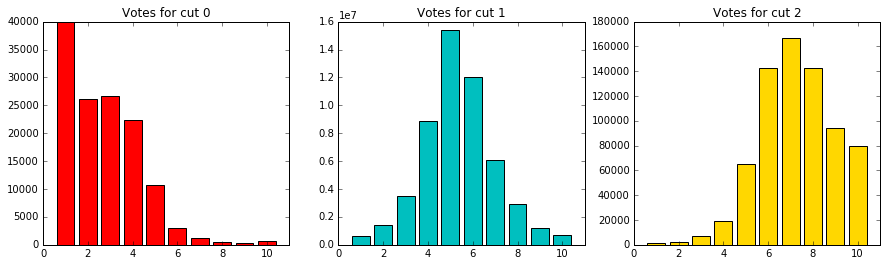

In [40]:
fig = plt.figure(figsize=(15, 4))

for j in range(0,3):
    dataAux=data[(data.iloc[:,38]==j)]
    voteCounts=[]
    for i in range(2,12):
        voteCounts.append(sum(dataAux.iloc[:,i]))

    fig1=fig.add_subplot(1,3,j+1)
    fig1.bar(range(1,11),voteCounts, align='center',color=colorGraph[j])
    fig1.set_title('Votes for cut %d'%j)
    plt.xlim([0,11])
    #plt.ylim([0,18000000])

plt.show()

In [42]:
num_images=len(data)
auxWeight=numpy.array([0]*num_images)
for i in range(0,num_images):
    auxWeight[i]=numpy.floor(data.iloc[i,37])
data.loc[:,'Weight'] = pandas.Series(auxWeight, index=data.index)

In [45]:
for i in range(0,10):
    print('# of images with mean in range [%d, %d): %d' % (i,i+1,sum(data.iloc[:,38]==i)))


# of images with mean in range [0, 1): 0
# of images with mean in range [1, 2): 5
# of images with mean in range [2, 3): 533
# of images with mean in range [3, 4): 7442
# of images with mean in range [4, 5): 66053
# of images with mean in range [5, 6): 131166
# of images with mean in range [6, 7): 46858
# of images with mean in range [7, 8): 3249
# of images with mean in range [8, 9): 47
# of images with mean in range [9, 10): 0


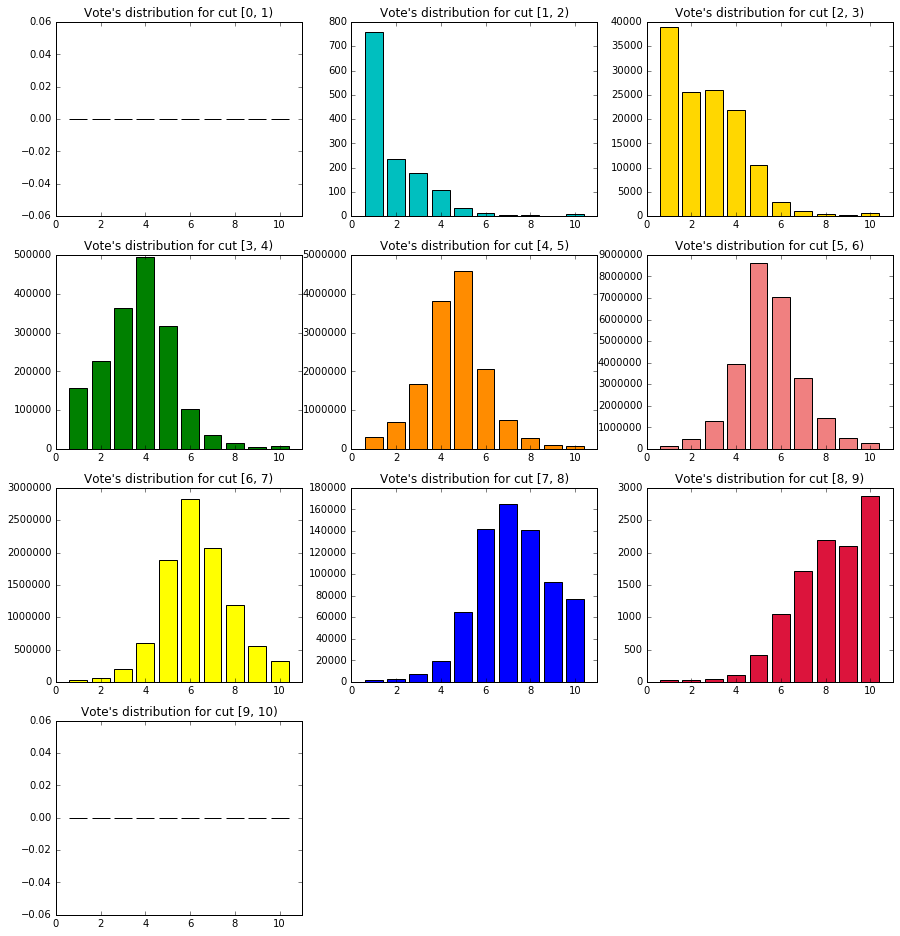

In [53]:
fig = plt.figure(figsize=(15, 16))

for j in range(0,10):
    dataAux=data[(data.iloc[:,38]==j)]
    voteCounts=[]
    for i in range(2,12):
        voteCounts.append(sum(dataAux.iloc[:,i]))

    fig1=fig.add_subplot(4,3,j+1)
    fig1.bar(range(1,11),voteCounts, align='center',color=colorGraph[j])
    fig1.set_title("Vote's distribution for cut [%d, %d)"%(j,j+1))
    plt.xlim([0,11])
    #plt.ylim([0,18000000])

plt.show()

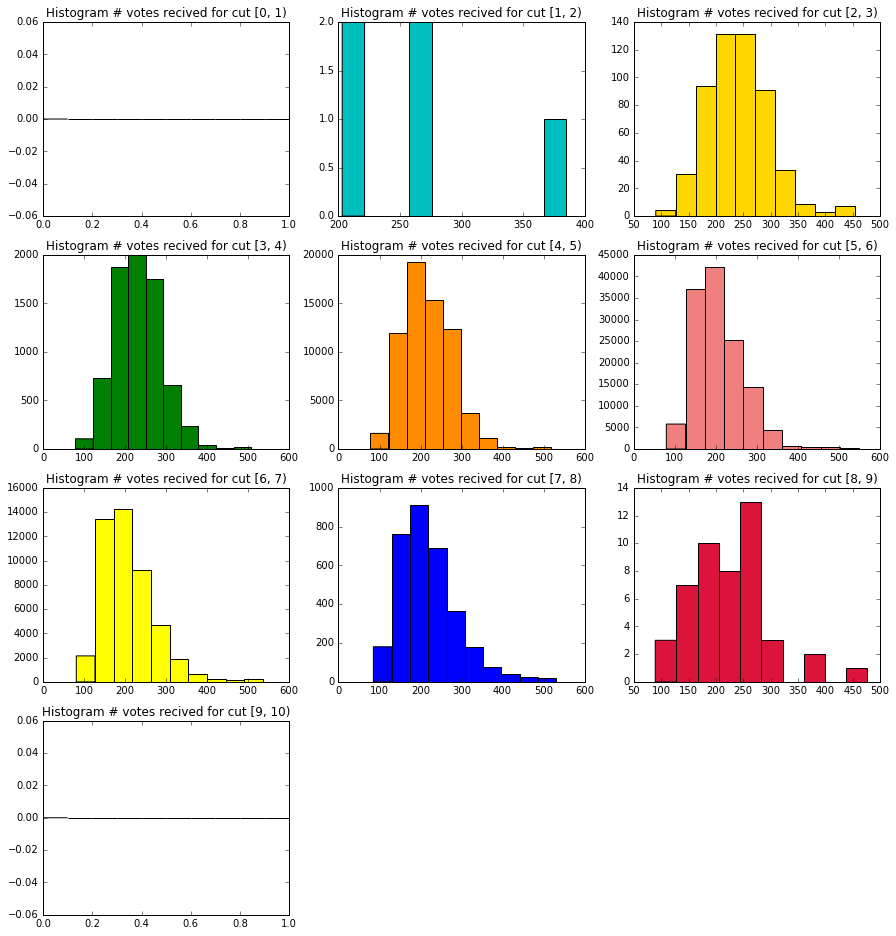

In [54]:
fig = plt.figure(figsize=(15, 16))

for j in range(0,10):
    dataAux=data[(data.iloc[:,38]==j)]
    voteCounts=[]
    num_images=len(dataAux)
    for i in range(0,num_images):
        voteCounts.append(sum(dataAux.iloc[i,2:12]))

    fig1=fig.add_subplot(4,3,j+1)
    fig1.hist(voteCounts,color=colorGraph[j])
    fig1.set_title('Histogram # votes recived for cut [%d, %d)'%(j,j+1))

plt.show()